In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857


In [3]:
df.isnull().sum() / df.count() * 100

FlightNumber       0.000
Date               0.000
BoosterVersion     0.000
PayloadMass        0.000
Orbit              0.000
LaunchSite         0.000
Outcome            0.000
Flights            0.000
GridFins           0.000
Reused             0.000
Legs               0.000
LandingPad        40.625
Block              0.000
ReusedCount        0.000
Serial             0.000
Longitude          0.000
Latitude           0.000
dtype: float64

In [4]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

In [ ]:
TASK 1: Calculate the number of launches on each site

In [6]:
launch_counts=df['LaunchSite'].value_counts()

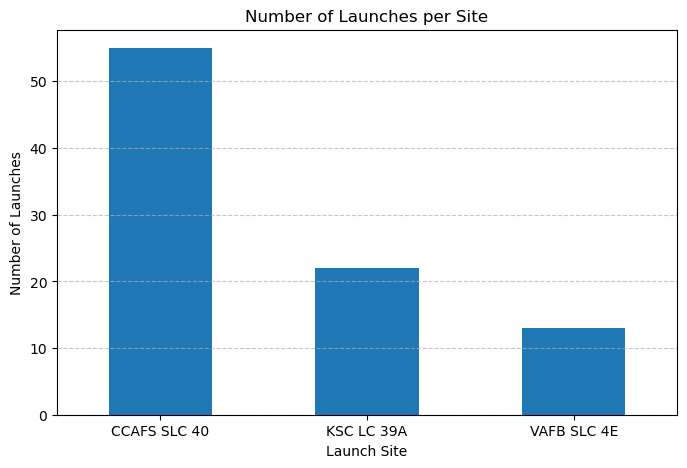

In [7]:
import matplotlib.pyplot as plt

launch_counts.plot(kind='bar', figsize=(8,5))

plt.title('Number of Launches per Site')
plt.xlabel('Launch Site')
plt.ylabel('Number of Launches')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
TASK 2: Calculate the number and occurrence of each orbit
Use the method .value_counts() to determine the number and occurrence of each orbit in the column Orbit

In [8]:
orbit_counts = df['Orbit'].value_counts()
orbit_counts

Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64

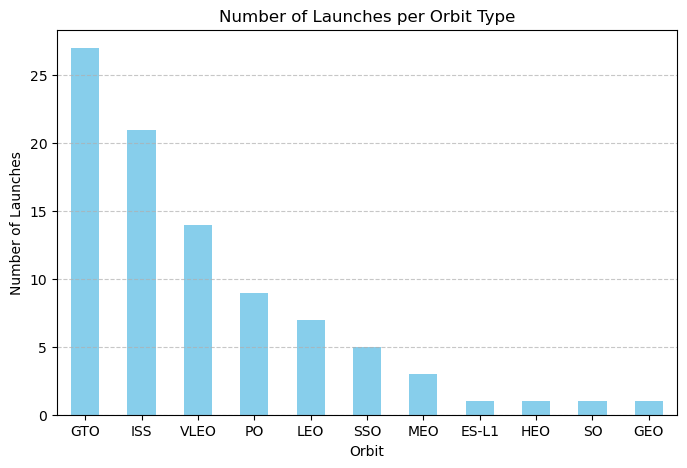

In [9]:
import matplotlib.pyplot as plt

orbit_counts.plot(kind='bar', figsize=(8,5), color='skyblue')

plt.title('Number of Launches per Orbit Type')
plt.xlabel('Orbit')
plt.ylabel('Number of Launches')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [10]:
orbit_percent = df['Orbit'].value_counts(normalize=True) * 100
print(orbit_percent)

Orbit
GTO      30.000000
ISS      23.333333
VLEO     15.555556
PO       10.000000
LEO       7.777778
SSO       5.555556
MEO       3.333333
ES-L1     1.111111
HEO       1.111111
SO        1.111111
GEO       1.111111
Name: proportion, dtype: float64


In [ ]:
TASK 3: Calculate the number and occurrence of mission outcomes per orbit type
1. Use the Pandas method .value_counts() on the Outcome column
to count how many times each unique outcome appears.
2. Assign the result to a new variable named landing_outcomes.

In [11]:
# Use the .value_counts() method to count each type of landing outcome
landing_outcomes = df['Outcome'].value_counts()

# Display the results
landing_outcomes

Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64

In [12]:
# Enumerate all unique outcomes to view their index
for i, outcome in enumerate(landing_outcomes.keys()):
    print(i, outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [13]:
# Create a set of outcomes where the first stage did not land successfully
bad_outcomes = set(landing_outcomes.keys()[[1,3,5,6,7]])

# Display bad outcomes
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [ ]:
TASK 4: Create a landing outcome label from Outcome column

In [14]:
landing_class = []


for outcome in df['Outcome']:
    if outcome in bad_outcomes:   
        landing_class.append(0)   
    else:
        landing_class.append(1)   

In [15]:
df['Class'] = landing_class

df[['Outcome', 'Class']].head(10)

,Outcome,Class
0,None None,0
1,None None,0
2,None None,0
3,False Ocean,0
4,None None,0
5,None None,0
6,True Ocean,1
7,True Ocean,1
8,None None,0
9,None None,0


In [16]:

success_rate = df['Class'].mean() * 100
print(f"Landing success rate: {success_rate:.2f}%")

Landing success rate: 66.67%


In [17]:
df.to_csv('dataset_wrangled.csv', index=False)

print("File exported successfully as 'dataset_wrangled.csv'")

File exported successfully as 'dataset_wrangled.csv'
